In [2]:
%run ../services/imports.py
%run ../services/function.py
%run ../services/visualization.py

importing Jupyter notebook from /home/jean/project/project_dataScience_POSCOMP/notebooks/../services/especialidades.ipynb


In [3]:
visualizacao = Visualizacao()

In [4]:
data_poscomp = pd.read_csv('../dados/dataset_poscomp.csv')

In [5]:
# data_poscomp = Function.substituir_palavras(data_poscomp, [
#     'representação do conhecimento',
#  'representação de conhecimento e raciocínio',
#  'representação do conhecimento e raciocínio',
# ], 'representação do conhecimento')

In [6]:
# data_poscomp = Function.substituir_palavras(data_poscomp, [
#  'teoria dos otimização',
#  'heurísticas e meta-heurísticas otimização'
# ], 'otimização')

# data_poscomp = data_poscomp.replace(to_replace={'otimização (interdepartamental)':'otimização', 
#                           'otimização (programação linear não linear e inteira)': 'otimização'}, inplace=False)

In [7]:
data_poscomp = data_poscomp.replace(to_replace={'desenvolvimento de plataformas para iot (internet das coisas)':'redes de computadores'},
                                                inplace=False)

In [8]:
f = data_poscomp[data_poscomp['ESPECIALIDADE'].str.contains('proce')]
print(f['ESPECIALIDADE'].sort_values().value_counts())
list(f['ESPECIALIDADE'].unique())

ESPECIALIDADE
processamento paralelo e distribuído    135
Name: count, dtype: int64


['processamento paralelo e distribuído']

In [9]:
teste = data_poscomp[data_poscomp['total'] > 6]
teste['total'].describe()

count    10974.000000
mean        29.884363
std          7.528071
min          8.000000
25%         24.000000
50%         29.000000
75%         35.000000
max         62.000000
Name: total, dtype: float64

In [10]:
especialidades = data_poscomp['ESPECIALIDADE'].value_counts()
especialidades = pd.DataFrame(especialidades)
especialidades.head(30)

,count
ESPECIALIDADE,
inteligência artificial,1828
engenharia de software,1619
sistemas de computação,1368
Demais áreas,834
redes de computadores,832
sistemas de informação,620
computação aplicada,492
banco de dados,448
aprendizado de máquina,310


In [11]:
# # library & dataset
# import matplotlib.pyplot as plt
# import seaborn as sns
 
# # left
# sns.pairplot(df1, kind="scatter", hue="ESPECIALIDADE", markers=["o", "s", "D"], palette="Paired")
# # plt.savefig('distribuition.png', dpi=600)

# plt.show()

In [12]:
linhas_inteligenciaArtificial = ['inteligência artificial',
                                 'otimização',
                                 'aprendizado de máquina',
                                 'visão computacional',
                                 'sistemas inteligentes',
                                 'computação visual',
                                 'ciência de dados',
                                 ]

linhas_redesComputadores = ['redes de computadores',
                            'sistemas embarcados',
                            'processamento paralelo e distribuído'
                           ]

linhas_engenhariaSoftware = ['engenharia de software',
                             'metodologias e técnicas de computação',
                             'modelagem computacional',
                            ]

linhas_sistemaComputacao = ['sistemas de computação',
                            'sistemas de informação',
                            'arquitetura de computadores',
                            'tecnologia da informação',
                           ]

linhas_outros = ['banco de dados',
                'computação aplicada',
                'informática na educação', 
                'computação gráfica',
                'aplicações computacionais',
                'Demais áreas']

In [13]:
df = data_poscomp.copy()

In [14]:
# Defina as condições e os valores correspondentes para a nova coluna
condicoes = [
    df['ESPECIALIDADE'].isin(linhas_inteligenciaArtificial),
    df['ESPECIALIDADE'].isin(linhas_sistemaComputacao),
    df['ESPECIALIDADE'].isin(linhas_engenhariaSoftware),
    df['ESPECIALIDADE'].isin(linhas_redesComputadores),
    df['ESPECIALIDADE'].isin(linhas_outros),

]

valores = ['inteligência artificial', 'sistemas de computação',
          'engenharia de software','redes de computadores', 'Outros']  # Valores correspondentes às condições

# Use a função numpy.select para criar a nova coluna
df['linhas_pesquisas'] = np.select(condicoes, valores, default='Demais areas')

# Exiba o DataFrame resultante
df['linhas_pesquisas'].value_counts()

linhas_pesquisas
inteligência artificial    3245
sistemas de computação     2320
Outros                     2149
engenharia de software     2087
redes de computadores      1175
Name: count, dtype: int64

In [15]:
df_3d = df.loc[:,['matematica','fund_computacao','tec_computacao','linhas_pesquisas']]
df_MenosOutros = df_3d[df_3d['linhas_pesquisas'] != 'Outros']

In [16]:
df_3d['linhas_pesquisas'] = df_3d['linhas_pesquisas'].astype('category')
df_3d['linhas_pesquisas_numeric'] = df_3d['linhas_pesquisas'].cat.codes

In [17]:
label_mapping = {0:'Outros',
                 1:'engenharia de software',
                 2:'inteligência artificial',
                 3:'redes de computadores',
                 4:'sistemas de computação',}

In [18]:
# from matplotlib.lines import Line2D
# fig = plt.figure(figsize=(12, 10))
# ax = plt.axes(projection='3d')

# sctt = ax.scatter3D(df_3d['matematica'], df_3d['fund_computacao'],
#                     df_3d['tec_computacao'], c=df_3d['linhas_pesquisas_numeric'], cmap='seismic')

# ax.set_xlabel('Matemática', labelpad=10)
# ax.set_ylabel('Fundamentos da Computação', labelpad=10)
# fig.text(0.85, 0.5, 'Tecnologia da Computação', va='center', rotation='vertical', fontsize=12)

# # Map numeric labels to corresponding names
# label_names = [label_mapping[label] for label in df_3d['linhas_pesquisas_numeric'].unique()]

# # Create custom legend entries with Line2D objects
# legend_entries = [Line2D([0], [0], marker='o', color='w', markerfacecolor=sctt.cmap(sctt.norm(label)), 
#                          markersize=10, label=name) for label, name in zip(df_3d['linhas_pesquisas_numeric'].unique(), label_names)]

# # Create a custom legend
# ax.legend(handles=legend_entries, title='Grupo', loc='upper right')
# plt.title("Especialidade com outros")
# # plt.savefig('notas_eixo.png', dpi=600)
# plt.show()


In [19]:
df_MenosOutros['linhas_pesquisas'] = df_MenosOutros['linhas_pesquisas'].astype('category')
df_MenosOutros['linhas_pesquisas_numeric'] = df_MenosOutros['linhas_pesquisas'].cat.codes

In [20]:
df_MenosOutros['linhas_pesquisas'].unique()

['engenharia de software', 'sistemas de computação', 'inteligência artificial', 'redes de computadores']
Categories (4, object): ['engenharia de software', 'inteligência artificial', 'redes de computadores', 'sistemas de computação']

In [21]:
label_mapping = {0:'engenharia de software',
                 1:'inteligência artificial',
                 2:'redes de computadores',
                 3:'sistemas de computação',}

In [22]:
# fig = plt.figure(figsize=(12, 10))
# ax = plt.axes(projection='3d')

# sctt = ax.scatter3D(df_MenosOutros['matematica'], df_MenosOutros['fund_computacao'],
#                     df_MenosOutros['tec_computacao'], c=df_MenosOutros['linhas_pesquisas_numeric'], cmap='seismic')

# ax.set_xlabel('Matemática', labelpad=10)
# ax.set_ylabel('Fundamentos da Computação', labelpad=10)
# fig.text(0.85, 0.5, 'Tecnologia da Computação', va='center', rotation='vertical', fontsize=12)

# # Map numeric labels to corresponding names
# label_names = [label_mapping[label] for label in df_MenosOutros['linhas_pesquisas_numeric'].unique()]

# # Create custom legend entries with Line2D objects
# legend_entries = [Line2D([0], [0], marker='o', color='w', markerfacecolor=sctt.cmap(sctt.norm(label)), 
#                          markersize=10, label=name) for label, name in zip(df_3d['linhas_pesquisas_numeric'].unique(), label_names)]

# # Create a custom legend
# ax.legend(handles=legend_entries, title='Grupo', loc='upper right')
# plt.title("Especialidade Sem 'Outros'")

# # plt.savefig('notas_eixoSemOutros.png', dpi=600)

# plt.show()


In [23]:
areas_computation = ['inteligência artificial',
                     'sistemas de computação'
                    ]

areas_information = ['redes de computadores',
                     'engenharia de software',
                     'Outros'
                    ]

In [24]:
# Defina as condições e os valores correspondentes para a nova coluna
condicoes = [
    df['linhas_pesquisas'].isin(areas_computation),
    df['linhas_pesquisas'].isin(areas_information),
]

valores = ['computacao', 'informatica']  # Valores correspondentes às condições

# Use a função numpy.select para criar a nova coluna
df['area_concentration'] = np.select(condicoes, valores, default='Outro')

# Exiba o DataFrame resultante
df['area_concentration'].value_counts()

area_concentration
computacao     5565
informatica    5411
Name: count, dtype: int64

In [25]:
from wordcloud import WordCloud 

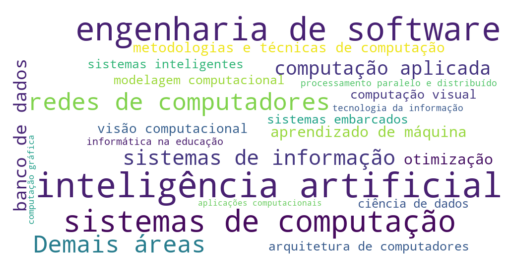

In [26]:
text = df['ESPECIALIDADE'].value_counts()[:80]
text = text.to_dict()

stopwords = set(['o', 'a', 'e', 'é', 'de', 'da', 'do', 'para', ' e'])

wordcloud2 = WordCloud(background_color="white",
                       random_state=42, 
                       min_word_length=3,
                        width=1000, height=500,
                        stopwords=stopwords
                       ).generate_from_frequencies(text)
# WordCloud.generate_from_frequencies

plt.imshow(wordcloud2, interpolation="bilinear")
plt.axis("off")
# plt.margins(x=0, y=0)
plt.savefig('../imagens/nuvem_palavras.pdf', format='pdf', dpi = 300, bbox_inches='tight')
plt.show()

In [27]:
# contagem_areas = data_poscomp.groupby(['ESTADO', 'ESPECIALIDADE']).size().reset_index(name='CONTAGEM')
# contagem_areas = contagem_areas.sort_values(['ESTADO', 'CONTAGEM'], ascending=[True, False])
# areas_mais_frequentes = contagem_areas.groupby('ESTADO').first().reset_index()
# print(areas_mais_frequentes)

In [35]:
# Supondo que 'data_poscomp_esp' seja o seu DataFrame
qtd = df.groupby(['ESPECIALIDADE', 'ESTADO']).size().reset_index(name='counts')

In [36]:
# Encontre a especialidade predominante para cada estado
idx = qtd.groupby(['ESTADO'])['counts'].transform(max) == qtd['counts']
result_df = qtd[idx]

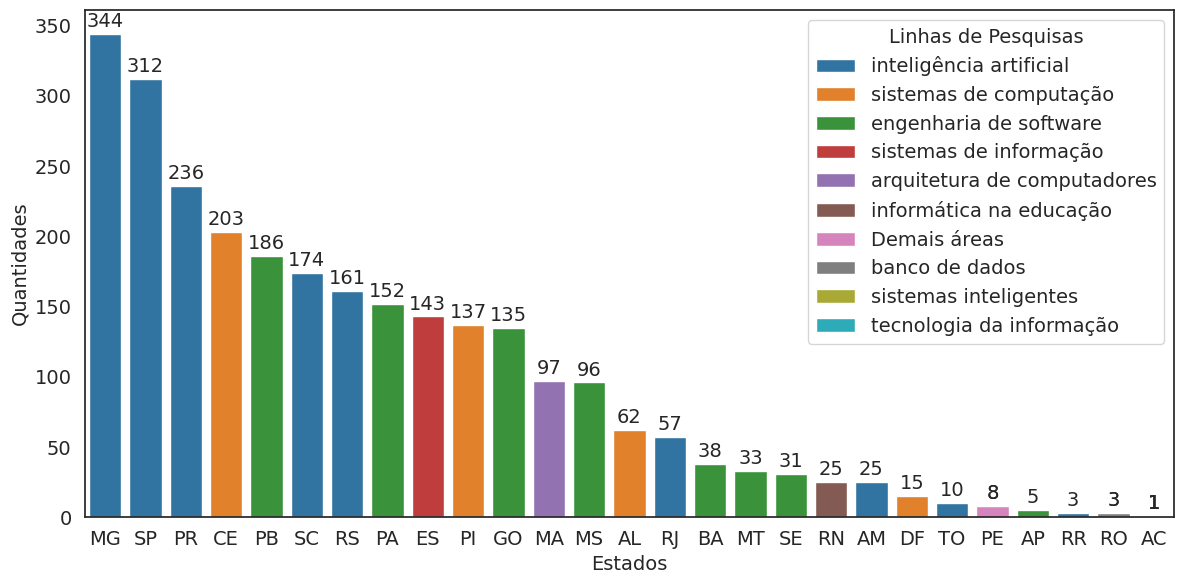

In [37]:
visualizacao.barplot_view(result_df.sort_values(['counts'], ascending=False), 
                          x='ESTADO', y='counts', hue='ESPECIALIDADE', figsize=(12,6), dodge=False,
                         save_path='../imagens/especialidades_estados.pdf', title_legend='Linhas de Pesquisas', ylabel="Quantidades",
                         xlabel="Estados")

In [28]:
df = df[(df['area_concentration'] != 'Outro')]

In [29]:
# df.to_csv('../dados/dataset_poscomp.csv', index=False)

In [30]:
df['area_concentration'].value_counts()

area_concentration
computacao     5565
informatica    5411
Name: count, dtype: int64

In [33]:
df

,INSCRICAO,NOME,SEXO,ESTADO,ESPECIALIDADE,PRESENTE DIA1,CARGO,Matemática Discreta,Cálculo Diferencial e Integral,Álgebra Linear,...,Processamento de Imagens,Banco de Dados,ANO,IDADE,matematica,fund_computacao,tec_computacao,total,linhas_pesquisas,area_concentration
0,39401645886-1,ABELARDO VIEIRA MOTA,M,CE,Demais áreas,S,Mestrado/Doutorado,3.0,3.0,2.0,...,1.0,1.0,2016,27,14.0,21.0,10.0,45.0,Outros,informatica
1,39401663587-8,ABNER MATHEUS COSTA DE ARAUJO,M,RS,metodologias e técnicas de computação,S,Mestrado/Doutorado,3.0,2.0,3.0,...,2.0,1.0,2016,21,16.0,22.0,12.0,50.0,engenharia de software,informatica
2,39401651770-6,ABNER MOISES DOS SANTOS GOMES,M,SP,engenharia de software,S,Mestrado/Doutorado,0.0,1.0,1.0,...,2.0,1.0,2016,25,4.0,16.0,8.0,28.0,engenharia de software,informatica
3,39401671273-0,ABRAAO DA COSTA SANTANA,M,PA,sistemas de informação,S,Mestrado/Doutorado,1.0,0.0,1.0,...,1.0,0.0,2016,30,4.0,13.0,7.0,24.0,sistemas de computação,computacao
4,39401684751-5,ADA RAQUEL DOS SANTOS CRUZ,F,AM,computação gráfica,S,Mestrado/Doutorado,0.0,0.0,2.0,...,1.0,1.0,2016,19,6.0,15.0,11.0,32.0,Outros,informatica
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10971,51801394883-5,YULLI DIAS TAVARES ALVES,F,MG,inteligência artificial,S,Mestrado/Doutorado,3.0,2.0,3.0,...,0.0,1.0,2019,22,14.0,16.0,8.0,38.0,inteligência artificial,computacao
10972,51801395371-7,YURE PEREIRA CAMPOS,M,PB,redes de computadores,S,Mestrado/Doutorado,1.0,1.0,2.0,...,1.0,1.0,2019,48,10.0,16.0,9.0,35.0,redes de computadores,informatica
10973,51801394300-3,YURI MATHEUS DIAS PEREIRA,M,SP,engenharia de software,S,Mestrado/Doutorado,1.0,2.0,1.0,...,1.0,2.0,2019,24,9.0,18.0,8.0,35.0,engenharia de software,informatica
10974,51801396055-5,YURI MORASKI BATISTA,M,ES,inteligência artificial,S,Mestrado/Doutorado,1.0,2.0,2.0,...,1.0,0.0,2019,25,10.0,16.0,6.0,32.0,inteligência artificial,computacao
